# Data preprocessing

Description: This script cleans up the percentage estimates of SVI indices for Baltimore city. It removes any missing data and normalizes the indices.

Input data: CDC Social vulnerability (SVI) data collected from the 2020 census, for the state of Maryland.
- Documentation: https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/SVI_documentation_2020.html

Output data:  Normalized percentage estimates of SVI indices for census tracts (without missing data) in Baltimore city.

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
svi2020 = True
if svi2020:
    raw = "svi_md_2020"
else:
    raw = "svi_md"
# Filter SVI data by Baltimore City county
df = pd.read_csv(f"../raw_data/{raw}.csv")
df = df.loc[df['STCNTY'] == 24510] 
df = df.replace(-999, np.nan)

# Extract the percentage estimate columns
ep_df = df.loc[:, df.columns.str.contains('FIPS|EP_.*')]

# Remove data for 2 census tracts with missing data
drop_fips = [
             24510250600,  # South harbor
             24510100300   # Prison
             ]
drop_indices = ep_df.index[ep_df["FIPS"].isin(drop_fips)]
ep_df = ep_df.drop(index=drop_indices)

ep_df.head()

,FIPS,EP_POV150,EP_UNEMP,EP_HBURD,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,...,EP_NOVEH,EP_GROUPQ,EP_NOINT,EP_AFAM,EP_HISP,EP_ASIAN,EP_AIAN,EP_NHPI,EP_TWOMORE,EP_OTHERRACE
1266,24510010100,8.7,1.0,16.7,3.1,2.0,14.7,6.9,8.8,0.9,...,6.2,5.0,4.3,6.6,3.9,3.9,0.0,0.0,0.1,0.0
1267,24510010200,5.2,1.8,14.9,7.1,1.4,6.5,10.3,3.6,5.4,...,5.9,0.0,11.0,2.7,3.2,3.0,0.0,0.0,3.8,0.0
1268,24510010300,3.0,0.4,5.7,6.7,1.4,8.1,8.1,8.0,2.2,...,5.7,0.0,8.3,0.8,4.0,9.3,0.0,0.0,2.8,0.0
1269,24510010400,17.5,6.2,31.7,8.2,6.0,9.9,13.7,7.2,1.3,...,2.5,0.2,4.8,6.5,10.7,5.2,0.0,0.0,3.5,0.8
1270,24510010500,17.5,2.3,24.7,5.8,9.3,8.4,17.7,7.5,4.4,...,7.9,1.3,2.5,3.3,14.7,1.4,0.0,0.0,3.5,0.0


In [10]:
ep_df.isna().sum()

FIPS            0
EP_POV150       0
EP_UNEMP        1
EP_HBURD        0
EP_NOHSDP       1
EP_UNINSUR      1
EP_AGE65        1
EP_AGE17        0
EP_DISABL       1
EP_SNGPNT       0
EP_LIMENG       0
EP_MINRTY       0
EP_MUNIT        0
EP_MOBILE       1
EP_CROWD        0
EP_NOVEH        1
EP_GROUPQ       0
EP_NOINT        0
EP_AFAM         1
EP_HISP         1
EP_ASIAN        1
EP_AIAN         1
EP_NHPI         1
EP_TWOMORE      1
EP_OTHERRACE    1
dtype: int64

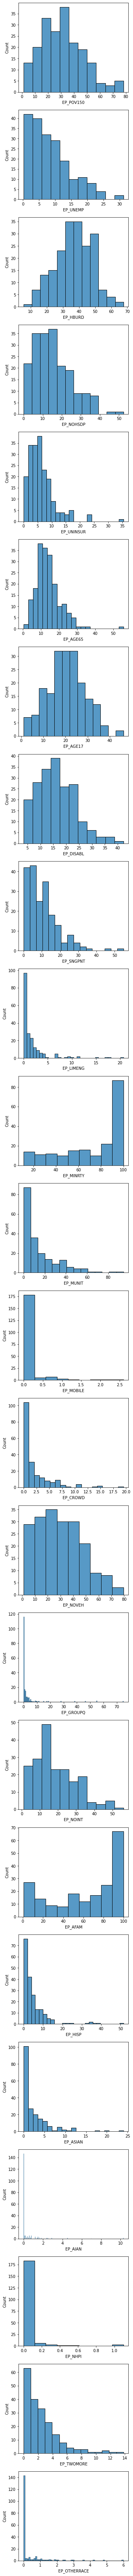

In [3]:
# Plot percentage estimates of all SVI indices.
# Visualize using histogram plots. 
def get_hists(cols, data):
    fig, axs = plt.subplots(len(cols), 1, figsize=(5, 5 * len(cols)))
    for ax, col in zip(axs, cols):
        sns.histplot(data=data, x=col, ax=ax)


cols = ep_df.columns[1:] # ignore the FIPS column
get_hists(cols, ep_df)

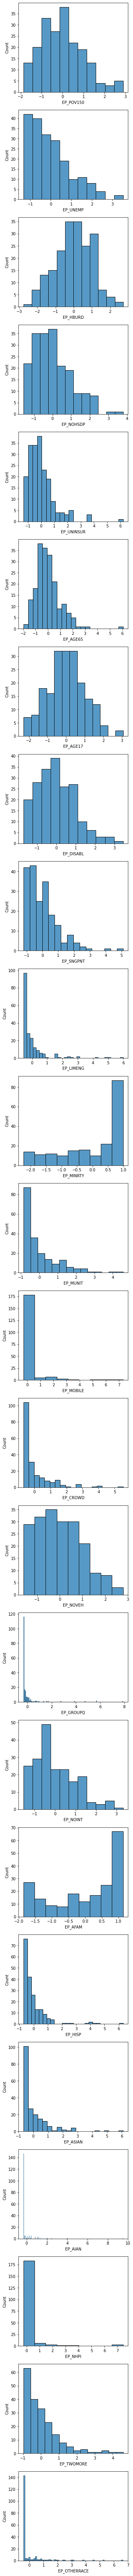

In [4]:
# Standardize data to mean zero, variance 1
scaler = StandardScaler()
df_temp = ep_df.drop(columns='FIPS')
scaled_df = pd.DataFrame(scaler.fit_transform(df_temp), columns = df_temp.columns)

# Re-plot the normalized estimates
cols = scaled_df.columns
get_hists(cols, scaled_df)

,EP_POV150,EP_UNEMP,EP_HBURD,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_LIMENG,...,EP_NOVEH,EP_GROUPQ,EP_NOINT,EP_AFAM,EP_HISP,EP_ASIAN,EP_AIAN,EP_NHPI,EP_TWOMORE,EP_OTHERRACE
EP_POV150,1.000000,0.645990,0.690602,0.659060,0.259873,-0.066222,0.455543,0.633641,0.628933,0.022005,...,0.820722,0.025081,0.515403,0.561221,-0.108586,-0.197301,0.023369,0.031985,-0.172342,-0.177886
EP_UNEMP,0.645990,1.000000,0.535785,0.497604,0.073570,0.131248,0.356987,0.507486,0.487406,-0.143985,...,0.587244,0.005287,0.405668,0.544413,-0.255845,-0.229018,0.071123,-0.014106,-0.147927,-0.109825
EP_HBURD,0.690602,0.535785,1.000000,0.424360,0.167557,0.028734,0.344355,0.521255,0.427053,-0.002556,...,0.631317,-0.029685,0.476035,0.582823,-0.136629,-0.115728,-0.035882,0.051683,-0.161090,-0.165487
EP_NOHSDP,0.659060,0.497604,0.424360,1.000000,0.452879,0.052566,0.408123,0.646662,0.428611,0.348579,...,0.624832,-0.092562,0.495781,0.387791,0.234799,-0.276593,0.037173,-0.113337,-0.205238,-0.131854
EP_UNINSUR,0.259873,0.073570,0.167557,0.452879,1.000000,-0.174765,0.223016,0.116715,0.062941,0.585529,...,0.110572,-0.128041,0.176003,0.015018,0.569431,-0.138371,0.002568,-0.078964,-0.134474,0.070538
EP_AGE65,-0.066222,0.131248,0.028734,0.052566,-0.174765,1.000000,-0.114214,0.332513,-0.137975,-0.163897,...,0.065609,-0.103396,0.263060,0.192955,-0.225493,-0.093331,-0.032692,-0.078476,-0.089940,0.033116
EP_AGE17,0.455543,0.356987,0.344355,0.408123,0.223016,-0.114214,1.000000,0.224768,0.645468,0.187742,...,0.247948,-0.279407,0.164352,0.355711,0.169092,-0.390838,-0.016912,-0.107458,-0.100363,-0.027308
EP_DISABL,0.633641,0.507486,0.521255,0.646662,0.116715,0.332513,0.224768,1.000000,0.344528,-0.022304,...,0.698926,-0.091928,0.635164,0.524798,-0.162799,-0.320088,0.132402,-0.046650,-0.199506,-0.151992
EP_SNGPNT,0.628933,0.487406,0.427053,0.428611,0.062941,-0.137975,0.645468,0.344528,1.000000,-0.062161,...,0.481589,-0.065213,0.211983,0.550195,-0.182551,-0.362816,0.001937,-0.055181,-0.201956,-0.065303
EP_LIMENG,0.022005,-0.143985,-0.002556,0.348579,0.585529,-0.163897,0.187742,-0.022304,-0.062161,1.000000,...,-0.041344,-0.094439,-0.019200,-0.257067,0.758911,0.096633,0.016986,0.015457,0.118608,0.038272


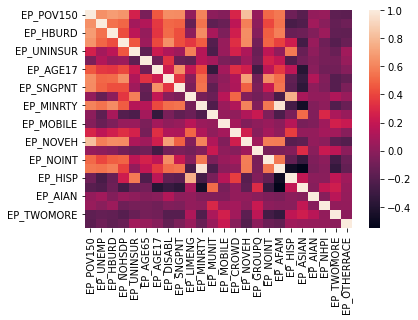

In [5]:
# Use correlation analysis to understand which 
# variables are highly correlated. 
corr_matrix = scaled_df.corr()
sns.heatmap(corr_matrix)
corr_matrix

In [6]:
# Add back the FIPS columns in final processing
scaled_df['FIPS'] = list(ep_df['FIPS'])
if svi2020:
    output = "SVI_EP_2020_Standard_Scaled"
else:
    output = "SVI_EP_Standard_Scaled"
scaled_df.to_csv(f"../processed_data/{output}.csv", index=False)